In [1]:
import math
last_digit = 7
Question_number = math.ceil((last_digit+1)/2)
print(Question_number)

4


In [2]:
import pandas as pd

In [3]:
student = pd.read_csv('Student_List.csv')

In [4]:
#displays the first five rows of data
student.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,Some College,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,Bachelor's,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,Some College,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,Some College,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


# A1. Exploring the dataset

In [6]:
#gets quick overview of data
student.describe()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2209.142667,16.464000,9.625516,14.540000,2.131333,1.901045
std,693.068389,1.124372,5.718608,8.459557,1.116654,0.923638
min,1002.000000,15.000000,0.001057,0.000000,0.000000,0.000000
25%,1599.750000,15.000000,4.717155,7.000000,1.000000,1.171847
50%,2211.500000,16.000000,9.362636,15.000000,2.000000,1.881249
75%,2804.750000,17.000000,14.374170,22.000000,3.000000,2.623266
max,3389.000000,18.000000,19.978094,29.000000,4.000000,4.000000


**1. There are 1500 students in this data set**

**2. The age range of the students is between 15 and 18**

In [8]:
#gets all the data types used in the dataframe
student.dtypes

StudentID              int64
Age                    int64
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring              object
ParentalSupport        int64
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
GPA                  float64
GradeClass            object
dtype: object

**3. There are three data types that are used in this student list DataFrame- integer numbers (int64), text or mixed numeric and non-numeric values (object) and floating numbers (float64). Columns like 
StudentID, Age, Absences, ParentalSupport use the int64 datatype to represent whole numbers. StudyTimeWeekly and GPA are both floating numbers to accomodate decimal values.**
**Categorical data such as ParentalEducation, Tutoring, Extracurricular, Sports, Music, Volunteering and GradeClass are stored as objects, which handlestring values effectively.**

In [10]:
#groups the data depending on the scores
grade = {'StudentID':'count'}
groupbyGrade = student.groupby('GradeClass').agg(grade)

#displays result
groupbyGrade

,StudentID
GradeClass,
A,60
B,183
C,244
D,248
F,765


4.

In [12]:
#calculates the percentage of students in each GradeClass
groupbyGrade['%'] = 100* groupbyGrade.StudentID / groupbyGrade.StudentID.sum()
groupbyGrade

,StudentID,%
GradeClass,,
A,60,4.000000
B,183,12.200000
C,244,16.266667
D,248,16.533333
F,765,51.000000


**Grade A- 4.00%**

**Grade B- 12.20%**
  
**Grade C- 16.27%**
  
**Grade D- 16.53%**
  
**Grade E- 0.00%**
  
**Grade F- 51.00%**

5.

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [16]:
#resets the index
groupbyGrade = groupbyGrade.reset_index() 

#rename the column studentID to student count
groupbyGrade.rename( 
columns={"StudentID":"Student count"}, 
inplace = True 
) 

#display updates
groupbyGrade

,GradeClass,Student count,%
0,A,60,4.000000
1,B,183,12.200000
2,C,244,16.266667
3,D,248,16.533333
4,F,765,51.000000


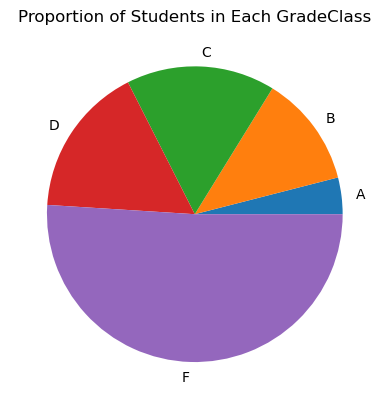

In [17]:
#creates pie chart using 'student count' from 'gradeclass'
plt.pie(groupbyGrade['Student count'], labels=groupbyGrade['GradeClass'])

#set the title 
plt.title("Proportion of Students in Each GradeClass")

#display
plt.show()

**The dataset shows that a concerning 51% of students fall into the F Grade catergory, indictaing GPAs below 2.0, while only 4% of students have acheived an A grade with GPAs of 3.5 or higher. This suggests that a majority of students are struggling academicaly, with only a small fraction excelling. The remaining studnets are distributed across B, C and D grades, with percentages gradually increasing from 12.2% to 16.53%, reflecting average to below-average performance for a significant portion of the student body.**

# A2. Exploring Parental Education

1.

In [21]:
# group student DF by parental education
# then aggregrate using previosuly defined grade function
groupbyPE = student.groupby('ParentalEducation').agg(grade) 
# grade agg is defined in section A1

#display results
groupbyPE

,StudentID
ParentalEducation,
Bachelor's,234
High School,458
Higher,77
No Education,154
Some College,577


In [22]:
#rename studentID to frequency
groupbyPE.rename( 
columns={"StudentID":"frequency"}, 
inplace = True 
) 

#display updates
groupbyPE

,frequency
ParentalEducation,
Bachelor's,234
High School,458
Higher,77
No Education,154
Some College,577


**1a. How many parents have the highest education level (denoted by Higher)
in this dataset?**
77 parents

**b. How many have no education?**
154 parents

**c. What is the most common level of parental education?**
some college is the most common level

2.

In [25]:
# reindex it so we get the order we want 
groupbyPE = groupbyPE.reindex(
    ['No Education', 'High School', 'Some College', "Bachelor's", 'Higher'])

# display the changes
groupbyPE

,frequency
ParentalEducation,
No Education,154
High School,458
Some College,577
Bachelor's,234
Higher,77


In [26]:
# reset the index
groupbyPE = groupbyPE.reset_index() 

# display
groupbyPE

,ParentalEducation,frequency
0,No Education,154
1,High School,458
2,Some College,577
3,Bachelor's,234
4,Higher,77


3.

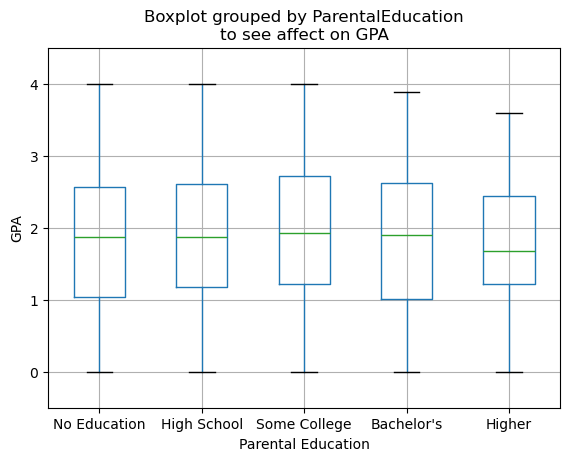

In [28]:
#defines the order that I want the boxplot categories to be
order = ['No Education', 'High School', 'Some College', "Bachelor's", 'Higher']
student['ParentalEducation'] = pd.Categorical(
    student['ParentalEducation'], categories=order, ordered=True) 
#pd.categorical functions to convert the parents education variable 
#into a categorical variable
#categories=order and ordered=True functions makes sure that 
#the order defined previously is obtained

#creates boxplot of GPA for eahc parental education category 
student.boxplot(column='GPA', by='ParentalEducation')

#sets  y-limits and labels for axis
plt.ylim(-0.5, 4.5)
plt.ylabel('GPA')
plt.xlabel('Parental Education')
plt.title("to see affect on GPA")#adds to the already given title

#displays
plt.show()

**The boxplot shows the distribution of student GPAs across different levels of parental education. From the plot, we can observe that there is no significant difference in the median GPA scores among the different categories of parental education, as the median GPA hovers just below 2.0 for all groups. The spread of the GPA scores is also quite similar across the categories, with all of them ranging from 0 to 4 in each group. This suggests that parental education level does not have a strong or clear impact on student GPA, as students from all educational backgrounds of parents show a similar distribution of GPA scores.**

# A3. GPA distribution and Correlation Analysis

1.

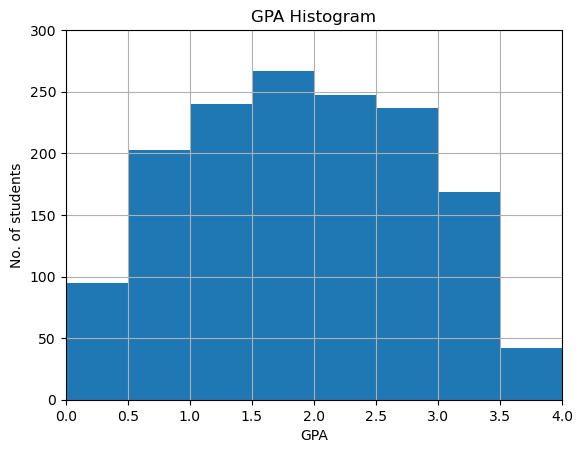

In [32]:
#creates histogram with 8 bins
student.GPA.hist(bins = 8) 

#sets limits
plt.xlim(0,4)               
plt.ylim(0,300)

#sets labels
plt.title("GPA Histogram")
plt.xlabel("GPA")
plt.ylabel("No. of students")

#displays
plt.show()


**The histogram displays the distribution of students' GPAs. The GPAs are spread out across the scale from 0 to 4, with the majority of students falling within the 1.0 to 3.0 GPA range. The highest concentration of students is around 1.5 to 2.0 GPA mark, indicating that this is the most common GPA range. The number of students decreases as the GPA moves towards the extremes of 0.0 to 0.5 and 3.5 to 4.0, suggesting that very low and very high GPAs are less common among the students in this dataset. The distribution is roughly symmetric, suggesting that most students have GPAs around the average, with fewer students at the high and low extremes.**

2.

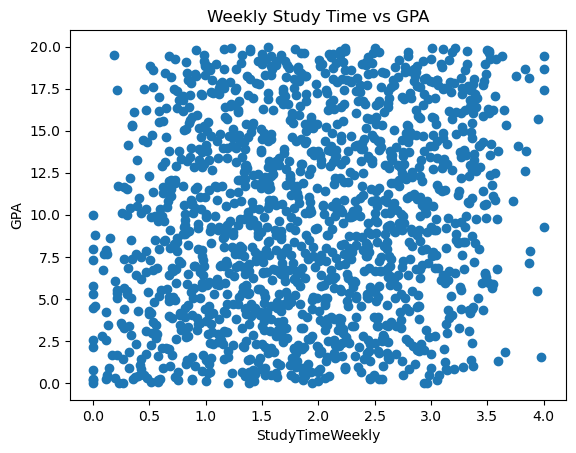

In [35]:
#creates scatter plot- GPA vs Weekly Study Time
plt.scatter(student['GPA'], student['StudyTimeWeekly'])

#ses labels 
plt.title("Weekly Study Time vs GPA")
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GPA')

#displays
plt.show() 

In [36]:
#calculates correlation  
correlation = student['GPA'].corr(student['StudyTimeWeekly'])

#prints it
print(correlation)

0.19049313037112514


**From the scatterplot, it can be seen that there is a weak positive correlation between the time a student spends studying during the week and their GPA. This is supported by the correlation coefficient of approximately 0.19. This suggests that while there is a slight tendency for higher study time to be associated with a higher GPA, the relationship is not strong. The weak correlation indicates that other factors may also pay a significant role in influencing GPA, and increasing study time alone may not have a substantial impact on academic performance.**

3.

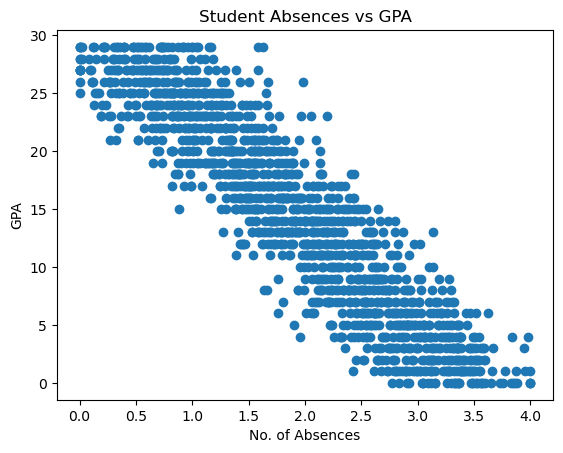

In [39]:
#creates scatter plot- GPA vs no. of absences
plt.scatter(student['GPA'], student['Absences'])

# creates labels
plt.title("Student Absences vs GPA")
plt.xlabel('No. of Absences')
plt.ylabel('GPA')

#displays
plt.show() 

In [40]:
#calculates correlation
correlation2 = student['GPA'].corr(student['Absences'])

#prints it
print(correlation2)

-0.919487694329095


**By observing the scatterplot, it can be seen that there is a clear strong negative correlation between the number of absences a student takes and their GPA. This is supported by the correlation coefficient of approximately -0.92. This means that as the number of absences increase, GPA scores tend to decrease significantly. The strong negative value suggests that higher levels of absenteeism are strongly associated with lower academic performance, implying that reducing absences could potentially improve GPA.**

# A4. Extracurricular Activities

1. 

In [44]:
#filters the DF to include students involved in the required activities 
#(in all activities in this case)
all_activities = student[(student['Sports'] == 'Yes') & 
                            (student['Music'] == 'Yes') &
                            (student['Volunteering'] == 'Yes') &
                            (student['Extracurricular'] == 'Yes')]
print('Group A:') #prints the label for the filtered group 
all_activities #displays the filered DF

Group A:


,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
106,2323,15,Some College,3.402855,4,No,1,Yes,Yes,Yes,Yes,2.517229,C
189,1838,15,Bachelor's,4.424756,21,Yes,2,Yes,Yes,Yes,Yes,1.943573,F
710,2981,15,Some College,18.652914,27,Yes,4,Yes,Yes,Yes,Yes,1.585820,F
733,2204,16,Bachelor's,8.468776,8,Yes,2,Yes,Yes,Yes,Yes,2.901186,C
1449,1448,16,Some College,13.812455,3,No,3,Yes,Yes,Yes,Yes,3.289823,B


**There are five students who are involved in all 4 activities**

2.

In [47]:
#filters the DF to include students NOT involved in the specific activities 
#(in none of the activities in this case)
no_activities = student[(student['Sports'] == 'No') & 
                            (student['Music'] == 'No') &
                            (student['Volunteering'] == 'No') &
                            (student['Extracurricular'] == 'No')]
print('Group B:') #prints label for group B
no_activities #Displays the filtered DF

Group B:


,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
6,2555,18,Some College,3.521786,22,No,4,No,No,No,No,0.935779,F
7,2513,15,High School,4.459000,27,No,1,No,No,No,No,0.000000,F
8,2811,16,Some College,7.520836,5,No,0,No,No,No,No,2.631368,C
11,1220,17,High School,1.232160,17,No,3,No,No,No,No,1.465549,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2978,17,High School,9.921510,4,No,1,No,No,No,No,2.307597,D
1483,2773,15,High School,4.915006,21,No,2,No,No,No,No,0.728795,F
1487,1585,16,Some College,12.276919,22,No,4,No,No,No,No,1.583084,F
1489,2049,15,Bachelor's,6.997909,21,No,3,No,No,No,No,1.137900,F


**There are 432 students who are in none of the 4 activities**

3.

In [50]:
#calculates the mean GPA of studnets involved in all activities (GroupA)
mean_gpa1 = all_activities['GPA'].mean()
print(f"Group A Mean GPA: {mean_gpa1}")

#calculates the mean GPA of students incolved in no activities (GroupB)
mean_gpa2 = no_activities['GPA'].mean()
print(f"Group B Mean GPA: {mean_gpa2}")

Group A Mean GPA: 2.4475262217999996
Group B Mean GPA: 1.7312226005532407


**The data shows a notable difference in the mean GPA between students with no listed activities (Group B) and those involved in all listed activities (Group A). Students in Group A have an average GPA of approximately 2.45, while those in Group B have an approximate average GPA of 1.73. This suggests that involvement in extracurricular activities might be associated with better academic perfromance. It could indicate that extracurricular engagements contribute postively to students' overall academic success, possibly by enhancing time management, providing motivation or offering valuable skills that translate into improves academic outcomes.**

# A5. Exploring Parental Support and Tutoring

1.

In [54]:
#defines the agg functions for GPA and Age columns
PS_GPA = {'GPA': {'mean', 'median'},  'Age': lambda x: (x == 18).sum()}

# groups the 'student' DF by parental support and apply agg function
groupbyParSup = student.groupby('ParentalSupport').agg(PS_GPA)

#flatten the columns
groupbyParSup.columns = ['GPA avg', 'GPA median', '18yr olds']

# displays results
groupbyParSup

,GPA avg,GPA median,18yr olds
ParentalSupport,,,
0,1.471672,1.521602,33
1,1.740455,1.735855,80
2,1.817007,1.845914,98
3,2.070669,2.068174,116
4,2.215516,2.227639,35


In [55]:
#resets index 
groupbyParSup = groupbyParSup.reset_index() 

#displays changes
groupbyParSup

,ParentalSupport,GPA avg,GPA median,18yr olds
0,0,1.471672,1.521602,33
1,1,1.740455,1.735855,80
2,2,1.817007,1.845914,98
3,3,2.070669,2.068174,116
4,4,2.215516,2.227639,35


2.

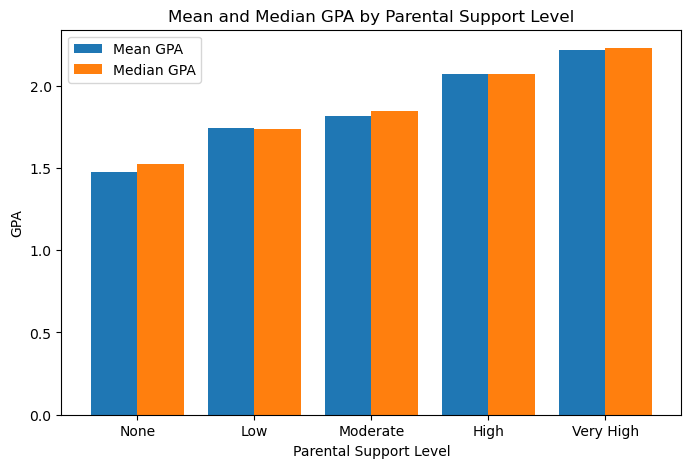

In [57]:
# defines a dictionary to map levels of parental support 
levels = {0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High"}

# maps the numerical parental support levels to descriptive labels
groupbyParSup['ParentalSupport'] = groupbyParSup['ParentalSupport'].map(levels)

# DF for plotting
plot_data = groupbyParSup[['GPA avg', 'GPA median']].set_index(
    groupbyParSup['ParentalSupport'])

# plotting the bar chart
ax = plot_data.plot.bar(figsize=(8, 5), width=0.8)

# sets labels and titles
ax.set_xticklabels(plot_data.index, rotation=360)
plt.xlabel('Parental Support Level')
plt.ylabel('GPA')
plt.title('Mean and Median GPA by Parental Support Level')

#adds a legend
plt.legend(["Mean GPA", "Median GPA"])

#displays the result
plt.show()

**This bar chart displays the mean and median GPA of students catergorised by their level of parental support. The chart indicates a positive ocrrelation between parental support and GPA, as both the mean and median GPAs increase with higher levels of parental support. Specifically, students with no or low parental support tend to have lower GPAs (averages of 1.47 and 1.74 respectively), while those with very high parental support acheive the highest GPAs (average of 2.23). The close alignment between the mean and median GPAs across all categories, especially the 'low' parnetal support category (with an average of 1.82 and median of 1.85), suggests and consistent distribution of GPAs within each group, with no significant skewness. Overall, the data underscores the potential impact of parental support on academic performance.**

In [59]:
#defines the agg function for GPA column
Tutoring_GPA = {'GPA': {'mean'}}

#groups stduent DF by Tutoring column and applies the agg function defined
groupbyTutoring = student.groupby('Tutoring').agg(Tutoring_GPA)

#displays result
groupbyTutoring

,GPA
,mean
Tutoring,
No,1.804967
Yes,2.123106


In [60]:
#fixes the formatting of the columns
groupbyTutoring.columns = ['GPA avg']

groupbyTutoring

,GPA avg
Tutoring,
No,1.804967
Yes,2.123106


In [61]:
#resets index
groupbyTutoring = groupbyTutoring.reset_index() 

groupbyTutoring

,Tutoring,GPA avg
0,No,1.804967
1,Yes,2.123106


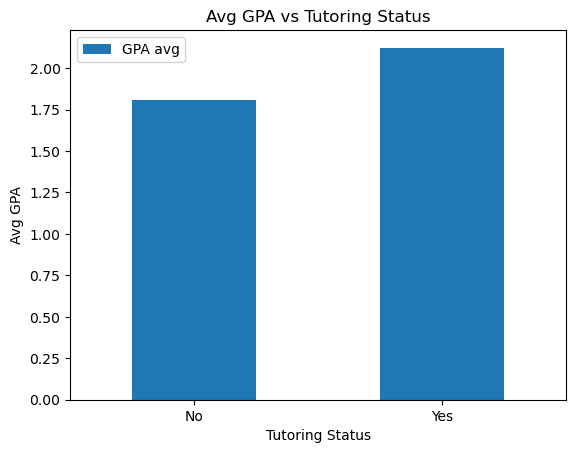

In [62]:
# plots bar chart
ax=groupbyTutoring.plot.bar() 

#sets x-axis tick labels to tutoring status
# ensures labels are readable and properly aligned
ax.set_xticklabels(groupbyTutoring['Tutoring'],rotation=360) 

#sets labels 
plt.xlabel('Tutoring Status') 
plt.ylabel('Avg GPA') 
plt.title('Avg GPA vs Tutoring Status') 

#displays graph
plt.show()

**The bar graph indicates a postive correlation between tutoring and higher academic perfromance among students. Specifically, students who receieve tutoring have an average GPA of 2.12, compared to 1.80 for those who do not. This suggests that tutoring may be beneficial in improving students' academic outcomes, as evidenced by the higher average GPA in the tutored group.**